In [1]:
from google.colab import files
uploaded = files.upload()

Saving BograFlood.csv to BograFlood.csv


In [4]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['BograFlood.csv']))

In [5]:
df.head(5)

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,1356,Bogra,1948,1,25.8,11.7,8.140625,74.218750,0.875926,1.1,7.296226,41883,435303.7,751187.5,24.88,89.36,20,1948.01,NaN
1,1357,Bogra,1948,2,33.3,13.3,11.140625,66.531250,1.022222,1.9,8.267925,41883,435303.7,751187.5,24.88,89.36,20,1948.02,NaN
2,1358,Bogra,1948,3,38.3,17.4,25.312500,61.812500,1.340741,2.1,8.573585,41883,435303.7,751187.5,24.88,89.36,20,1948.03,NaN
3,1359,Bogra,1948,4,39.5,22.7,69.140625,66.203125,1.740741,3.7,8.009434,41883,435303.7,751187.5,24.88,89.36,20,1948.04,NaN
4,1360,Bogra,1948,5,36.1,23.1,179.890625,76.859375,1.781481,4.3,7.303774,41883,435303.7,751187.5,24.88,89.36,20,1948.05,NaN


In [6]:
df.drop(columns='Station_Names',inplace=True)
df.drop(columns='Station_Number',inplace=True)
df.drop(columns='X_COR',inplace=True)
df.drop(columns='Y_COR',inplace=True)
df.drop(columns='LATITUDE',inplace=True)
df.drop(columns='LONGITUDE',inplace=True)
df.drop(columns='ALT',inplace=True)
df['Flood?'] = df['Flood?'].fillna(0)

In [7]:
df.head(5)

,Sl,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Period,Flood?
0,1356,1948,1,25.8,11.7,8.140625,74.218750,0.875926,1.1,7.296226,1948.01,0.0
1,1357,1948,2,33.3,13.3,11.140625,66.531250,1.022222,1.9,8.267925,1948.02,0.0
2,1358,1948,3,38.3,17.4,25.312500,61.812500,1.340741,2.1,8.573585,1948.03,0.0
3,1359,1948,4,39.5,22.7,69.140625,66.203125,1.740741,3.7,8.009434,1948.04,0.0
4,1360,1948,5,36.1,23.1,179.890625,76.859375,1.781481,4.3,7.303774,1948.05,0.0


In [9]:
from sklearn.model_selection import train_test_split
 
x = df.drop(['Flood?' , 'Sl'], axis=1)
y = df['Flood?']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [32]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential() 
model.add(Dense(20, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 20)                220       
                                                                 
 dense_16 (Dense)            (None, 1)                 21        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [37]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=10)

Epoch 1/100
56/56 [==============================] - 0s 4ms/step - loss: 0.5379 - accuracy: 0.9404 - val_loss: 0.1400 - val_accuracy: 0.9832
Epoch 2/100
56/56 [==============================] - 0s 7ms/step - loss: 0.1428 - accuracy: 0.9729 - val_loss: 0.1372 - val_accuracy: 0.9832
Epoch 3/100
56/56 [==============================] - 0s 5ms/step - loss: 0.1892 - accuracy: 0.9675 - val_loss: 0.1170 - val_accuracy: 0.9874
Epoch 4/100
56/56 [==============================] - 0s 5ms/step - loss: 0.1088 - accuracy: 0.9657 - val_loss: 0.2470 - val_accuracy: 0.9622
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.1189 - accuracy: 0.9711 - val_loss: 0.1632 - val_accuracy: 0.9874
Epoch 6/100
56/56 [==============================] - 0s 6ms/step - loss: 0.1580 - accuracy: 0.9657 - val_loss: 0.1109 - val_accuracy: 0.9874
Epoch 7/100
56/56 [==============================] - 0s 5ms/step - loss: 0.1055 - accuracy: 0.9693 - val_loss: 0.1094 - val_accuracy: 0.9874
Epoch 8/100
5

[]

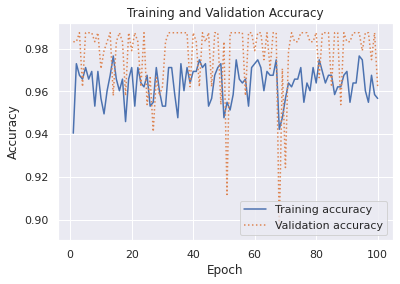

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Text(89.18, 0.5, 'Actual label')

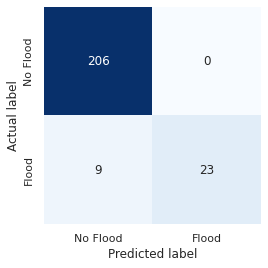

In [39]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['No Flood', 'Flood']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [41]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
print(classification_report(y_test, y_predicted, target_names=labels))

              precision    recall  f1-score   support

    No Flood       0.96      1.00      0.98       206
       Flood       1.00      0.72      0.84        32

    accuracy                           0.96       238
   macro avg       0.98      0.86      0.91       238
weighted avg       0.96      0.96      0.96       238

